<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_set_2020/blob/master/05_ANN_build_PSD_FIND_BUG_ago_28_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2
import zipfile
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
import sklearn
import matplotlib.pyplot as plt



In [2]:
########### CHECKED AGO 28 2020 ######################

In [3]:
!pip install mahotas

In [4]:
# Import the 'transform' module from 'skimage'
from skimage import transform 

In [5]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [6]:
# 03_ANN_NEW_DATA... only the grains in 882 are used for training 
#                    the ANN and segmented images are used to 
#                    train no-grain

# 03_ANN_NEW_DATA... only the grains in 882 are used for training the ANN and segmented images are used to train no-grain

In [7]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/Doutorado


In [8]:
# First step: get the segmented file (photos stored in csv file)

# First step: get the segmented file (photos stored in csv file)

In [9]:
labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

In [10]:
Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

y_valor=df['Type']

In [11]:
print(df)

      Unnamed: 0 Type          0  ...        782        783  Width
0              0    G    0.00000  ...    0.68631    0.68769    NaN
1              1    G    0.00000  ...    0.49262    0.50909    NaN
2              2    G    0.45321  ...    0.54919    0.55439    NaN
3              3    G    0.75367  ...    0.48524    0.61876    NaN
4              4    G    0.94521  ...    0.98108    0.95838    NaN
...          ...  ...        ...  ...        ...        ...    ...
1627          45    Z  146.27896  ...  177.99518  193.41644  158.0
1628          46    Z  189.54553  ...  174.20529  186.79413  178.0
1629          47    Z   77.16447  ...   68.11906   61.99939  121.0
1630          48    Z   93.59823  ...  157.16385  144.35010  186.0
1631          49    Z  110.17294  ...  128.05782   96.93800  199.0

[1632 rows x 787 columns]


In [12]:
print(df.head())

   Unnamed: 0 Type        0        1  ...      781      782      783  Width
0           0    G  0.00000  0.00000  ...  0.68642  0.68631  0.68769    NaN
1           1    G  0.00000  0.00000  ...  0.47277  0.49262  0.50909    NaN
2           2    G  0.45321  0.52257  ...  0.54645  0.54919  0.55439    NaN
3           3    G  0.75367  0.64590  ...  0.43356  0.48524  0.61876    NaN
4           4    G  0.94521  0.89736  ...  0.98942  0.98108  0.95838    NaN

[5 rows x 787 columns]


In [13]:
print(df)

      Unnamed: 0 Type          0  ...        782        783  Width
0              0    G    0.00000  ...    0.68631    0.68769    NaN
1              1    G    0.00000  ...    0.49262    0.50909    NaN
2              2    G    0.45321  ...    0.54919    0.55439    NaN
3              3    G    0.75367  ...    0.48524    0.61876    NaN
4              4    G    0.94521  ...    0.98108    0.95838    NaN
...          ...  ...        ...  ...        ...        ...    ...
1627          45    Z  146.27896  ...  177.99518  193.41644  158.0
1628          46    Z  189.54553  ...  174.20529  186.79413  178.0
1629          47    Z   77.16447  ...   68.11906   61.99939  121.0
1630          48    Z   93.59823  ...  157.16385  144.35010  186.0
1631          49    Z  110.17294  ...  128.05782   96.93800  199.0

[1632 rows x 787 columns]


In [14]:
quantidade= df.groupby('Type').size()
print(quantidade)

Type
B    180
G    245
I    180
N    115
V    162
Z    750
dtype: int64


In [15]:
df_G = df[df["Type"] == "G"] 
Cut=['Unnamed: 0','Type','Width']
FotosG= df_G.drop(Cut,axis=1)
print(FotosG)

           0        1        2        3  ...      780      781      782      783
0    0.00000  0.00000  0.00315  0.00851  ...  0.67356  0.68642  0.68631  0.68769
1    0.00000  0.00000  0.00000  0.00309  ...  0.49065  0.47277  0.49262  0.50909
2    0.45321  0.52257  0.56642  0.56989  ...  0.53468  0.54645  0.54919  0.55439
3    0.75367  0.64590  0.62497  0.63117  ...  0.43764  0.43356  0.48524  0.61876
4    0.94521  0.89736  0.61852  0.51112  ...  0.98909  0.98942  0.98108  0.95838
..       ...      ...      ...      ...  ...      ...      ...      ...      ...
859  0.23165  0.23021  0.24320  0.24350  ...  0.31947  0.31158  0.31221  0.30411
860  0.61049  0.60788  0.59600  0.56381  ...  0.44688  0.52280  0.54299  0.54212
861  0.22512  0.23546  0.22381  0.18768  ...  0.47572  0.46135  0.42758  0.39699
862  0.27590  0.33744  0.37933  0.38712  ...  0.45469  0.47264  0.47628  0.47473
863  0.36465  0.36691  0.36716  0.37197  ...  0.31352  0.30879  0.29508  0.28568

[245 rows x 784 columns]


In [ ]:
########### NOT COMPLETELY CHECKED AGO 28 2020 ######################

In [16]:
Size=28
img_G=[]
# FotosZ= np.array(FotosZ)

Num,cols=FotosG.shape
for i in range(Num):
  data=np.array(FotosG.iloc[i]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img_G.append(img28)

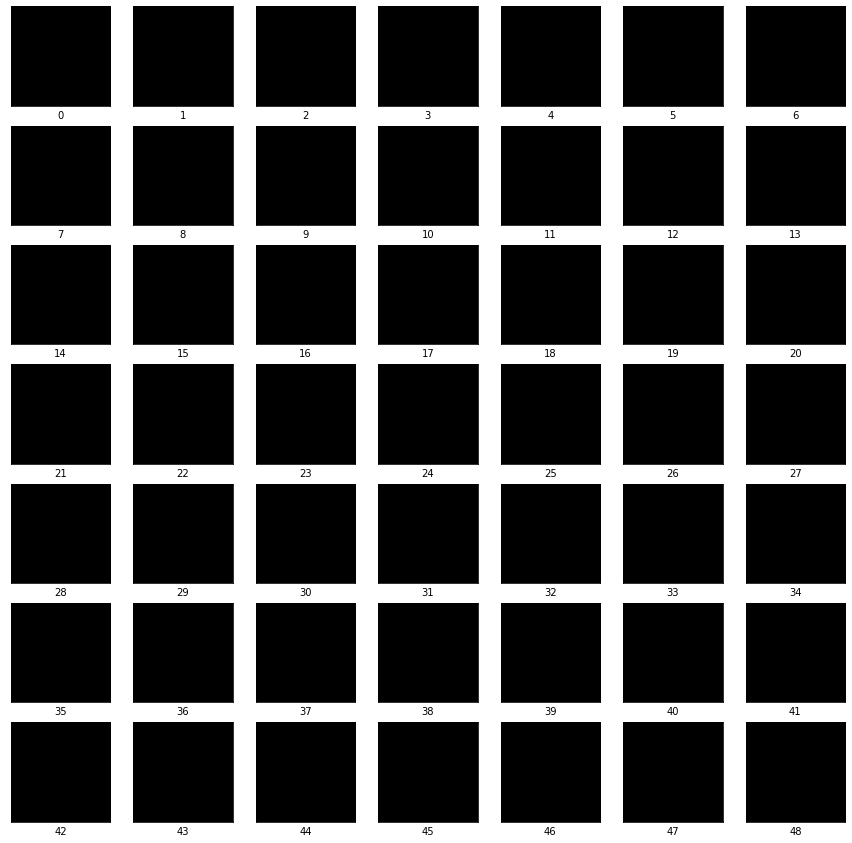

In [17]:
plt.figure(figsize=(15,15))
Num=49
for i in range(Num):
  img=img_G[i].resize(28,28)
  plt.subplot(7,7,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Foto=np.array(img_G[i]).reshape(28,28)
  plt.imshow(Foto, cmap = "gray")
  plt.xlabel(i)

In [27]:
print(img)

None


In [18]:
df_Z = df[df["Type"] == "Z"] 
Cut=['Unnamed: 0','Type','Width']
FotosZ= df_Z.drop(Cut,axis=1)
print(FotosZ)

              0          1          2  ...        781        782        783
882    99.66225  102.53902  105.61966  ...    0.00000    0.00000    0.00000
883    76.92050   71.22499   74.38184  ...   74.69497   74.31098   71.98919
884    93.92000   91.24000   73.32000  ...    0.00000    0.00000    0.00000
885    73.05943   80.09882   82.46129  ...  100.20395  109.51174  120.26761
886   122.86490  123.56383  124.44763  ...  100.99214   96.51134   90.73105
...         ...        ...        ...  ...        ...        ...        ...
1627  146.27896  149.26598  153.09581  ...  161.62216  177.99518  193.41644
1628  189.54553  211.03372  230.51788  ...  167.19521  174.20529  186.79413
1629   77.16447   76.29322   74.31848  ...   69.47470   68.11906   61.99939
1630   93.59823   93.16210   92.73212  ...  159.58344  157.16385  144.35010
1631  110.17294  121.77184  133.03445  ...  134.67851  128.05782   96.93800

[750 rows x 784 columns]


In [19]:
Size=28
img_Z=[]
# FotosZ= np.array(FotosZ)

Num,cols=FotosZ.shape
for i in range(Num):
  data=np.array(FotosZ.iloc[i]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img_Z.append(img28)


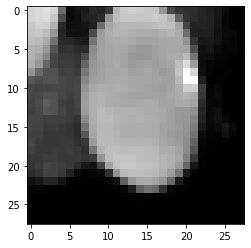

In [20]:
Foto=np.array(img_Z[0]).reshape(28,28)
plt.imshow(Foto, cmap = "gray")

' '

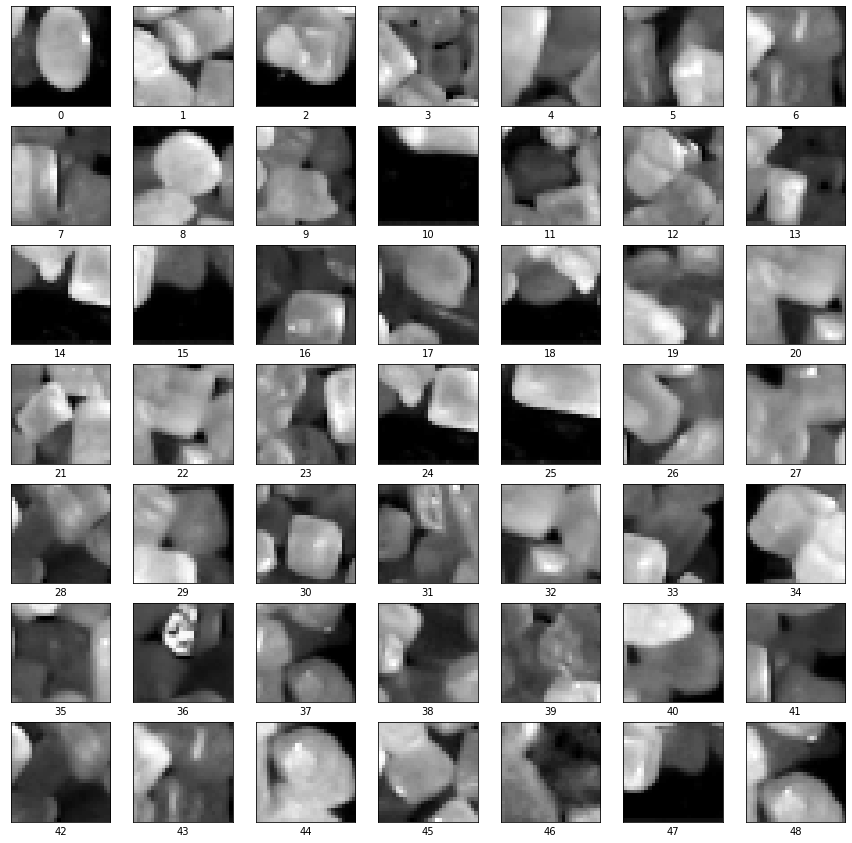

In [21]:
plt.figure(figsize=(15,15))
Num=49
for i in range(Num):
  img=img_Z[i].resize(28,28)
  plt.subplot(7,7,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Foto=np.array(img_Z[i]).reshape(28,28)
  plt.imshow(Foto, cmap = "gray")
  plt.xlabel(i)
''' '''

In [22]:
GRAO=[0]

' '

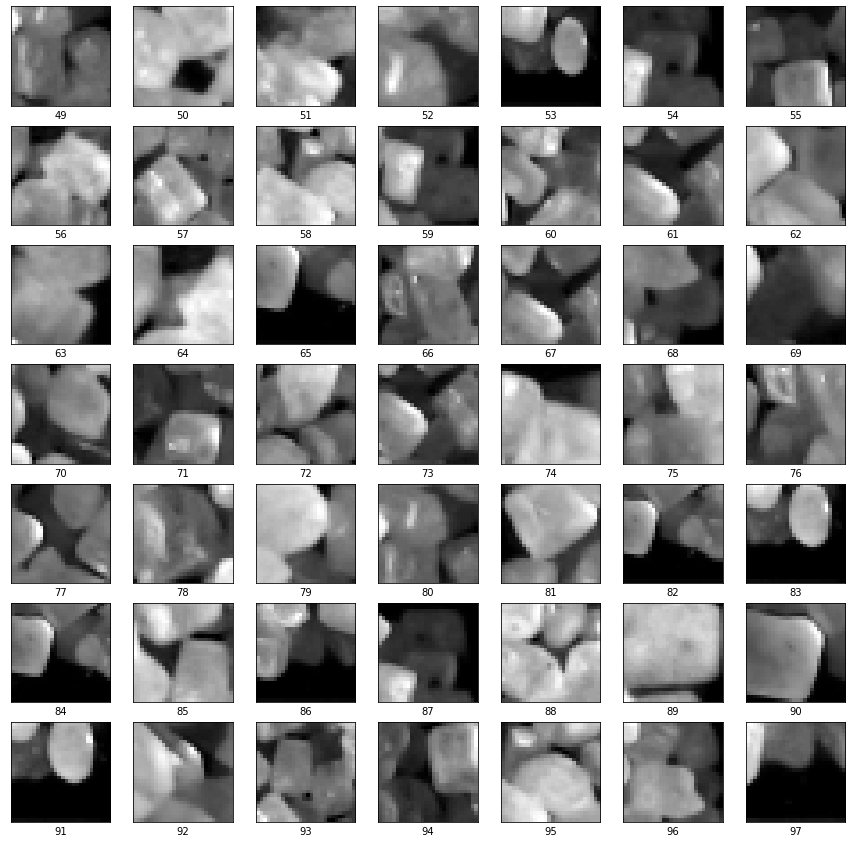

In [23]:
plt.figure(figsize=(15,15))
i=1
Start=Num*i
k=0
for i in range(Start,Start+Num):
  img=img_Z[i].resize(28,28)
  plt.subplot(7,7,k+1)
  k=k+1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Foto=np.array(img_Z[i]).reshape(28,28)
  plt.imshow(Foto, cmap = "gray")
  plt.xlabel(i)
''' '''

In [24]:
GRAO=[0,]

In [25]:
print(gxw)

NameError: ignored

In [ ]:
Num

In [ ]:
print(d.f_Zshape)

In [ ]:
########### NOT CHECKED AGO 28 2020 ######################

In [ ]:
df_teste=pd.read_csv(labels[2])
print(df_teste.head())

In [ ]:
print(df.tail())

In [ ]:
Fotos=df.drop(['Unnamed: 0','Type','Width'], axis=1)

In [ ]:
df=df.drop(['Unnamed: 0','Type','Width'], axis=1)

In [ ]:
print(df.describe())

In [ ]:
print(np.array(Fotos).shape )

# Second step: create the ann to evaluate which is a grain in photos segmented


In [ ]:
# only crop photos teach what is grain....

In [ ]:
images28=np.array(df)

In [ ]:
#print(y_valor)

In [ ]:
y_new=[]
Grain=0
Others=0
Cont=-1
Others_Local=[]
Grain_Local=[]
for x in y_valor:
  Cont=Cont+1
  if re.search('G', x):
    y_new.append(1)
    Grain=Grain+1
    Grain_Local.append(Cont)
  else:
    y_new.append(2)
    Others=Others+1
    Others_Local.append(Cont)

In [ ]:
print('Graos=',Grain)
print('Others=',Others)
print('Others local',Others_Local)
print('Grain local',Grain_Local)

sampled_list = random.sample(Others_Local,Grain)

In [ ]:
print('Graos=',Grain)
print('Others=',Others)
print('Others local',Others_Local)
sampled_list = random.sample(Others_Local,Grain)


In [ ]:
print('Graos=',Grain)
print('Others=',Others)
print('Others local',Others_Local)
print('Grain local',Grain_Local)


In [ ]:
x_new=[]
y_rede=[]
for i in range(Grain):
  x_new.append(Fotos.iloc[Grain_Local[i]])
  x_new.append(Fotos.iloc[sampled_list[i]])
  y_rede.append(y_new[Grain_Local[i]])
  y_rede.append(y_new[sampled_list[i]])


In [ ]:
np.array(x_new).shape

In [ ]:
#pd.DataFrame(y_rede).describe()

In [ ]:
# y_valor=np.copy(y_new)
y_total=np.copy(y_rede)

In [ ]:
#Define data train and data test
#images28=Fotos
images28=x_new #Fotos
W_train, W_test, yw_train, yw_test = train_test_split(np.array(images28), np.array(y_total), 
                                                    test_size=0.30, shuffle=True, 
                                                    random_state=42)

In [ ]:
print(len(y_total))
print(len(yw_test))
print(len(yw_train))
A=490*0.3
print(A)

In [ ]:
train_images=W_train #imagens utilizadas para o treino
train_labels=yw_train # resposta esperada para o treino
test_images=W_test
test_labels=yw_test

In [ ]:
#print(len(test_labels))

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# GRAIN use crop photos other cases segmented
model.fit(train_images, train_labels, epochs=200) 

In [ ]:
#ANN das imagens
x=np.array(W_test)
logits = model(x, training=False)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
#print(prediction)

In [ ]:
print(x)

In [ ]:
y_valor=np.copy(yw_test)
data = {'y_Actual': y_valor,
        'y_Predicted': prediction
        }  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
#print (df)

In [ ]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

In [ ]:
y_true = df['y_Actual']
y_pred = df['y_Predicted']
print(sklearn.metrics.classification_report(y_true, y_pred))

In [ ]:
#

# Third step: testing ANN other segmented images

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_August_2020
%cd marquesgabi_August_2020

In [ ]:
Transfere='img28_all00.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [ ]:
labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

In [ ]:
df=pd.read_csv(labels[0])
print(df.shape)

In [ ]:
df=pd.read_csv(labels[0])
Width_All=df['Width']
df=df.drop(['Unnamed: 0','Type','Width'], axis=1)
print(df.head())

# Fourth step test ANN for data to be used for PSD (Particle size distribution) determination

In [ ]:
# Mahotas used: marquesgabi_fev_2020/02_Mahotas_fracionado_fev_20_2020.ipynb

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

In [ ]:
import mahotas.features.texture as mht
import mahotas.features
from skimage import filters
from skimage import exposure
import skimage.feature as sk
from google.colab import files
from numpy import linalg as LA
from scipy import stats
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths
from scipy import integrate
import re
import Go2BlackWhite
import Go2Mahotas

In [ ]:

Escolha=['ASM', 'constrast', 'correl', 'variance', 'inv diff mom', 'sum aveg', 
         'sum var', 'sum entropy', 'entropy', 'dif var', 'dif entropy', 
         'IMC1', 'IMC2']

Prop=Escolha[1] # Propriedade a escolher para ter picos, largura de pico, proeminencia,...

In [ ]:
#ANN das imagens
x=np.array(df)
logits = model(x, training=False)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
#print(prediction)

In [ ]:
y=np.array(prediction)
Num=len(y)
print(Num)

In [ ]:
print(y)

In [ ]:
# select just the grains to show picture
grain=[]
Mahotas_Prop=[]
Todas_Fotos=[] 

img28_all=pd.DataFrame(x)
Width_Grain_2=[]

Size=28 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
#Row_Crop=1/3 # posicao do corte
Crop=int(Size*Row_Crop)


for i in range(Num):
  if(y[i]==1):
    grain.append(i)
    Width_Grain_2.append(Width_All[i])

cont=0 # 
cols=5
rows=int(len(grain)/cols)+1
Grao_in_All28=[]

for i in range(Num):
  if(y[i]==1):
    Grao_in_All28.append(i)
    cont=cont+1
    plt.subplot(rows,cols,cont) # subplot not allow cont=0
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    Foto=np.array(img28_all.iloc[i]).reshape(28,28)
    plt.imshow(Foto, cmap = "gray")
    plt.xlabel(i)

    Prop_Escolhida=[]
    
    # p_foto=ww[k].reshape(Size,Size)
    p_foto=Foto
    GLCM=[]
    glcm_haralick=[]
    x_ref=[]
    Count=Sub_Size
    p=np.zeros((Sub_Size,Sub_Size))
    j_ref=0
    Cada_foto=[]
    Posicao_X=[]
    Posicao_Y=[]
    for k in range(Size):
      if((k+Sub_Size-1)<Size):
        #print("(k+Sub_Size)=",(k+Sub_Size),"k=",k)
        for i in range(Sub_Size):
          Posicao_X.append(Crop+i)
          for j in range(Sub_Size):
            p[i,j]=p_foto[Crop+i,j+k]
            Posicao_Y.append(j+k)

        WW=np.copy(p) 
        Cada_foto.append(WW.ravel())
        x_ref.append(Count-Sub_Size)
        Count=Count+1
      
        Mahotas =pd.DataFrame(mahotas.features.haralick(p.astype(int)), columns =Escolha)
        Prop_Escolhida.append(Mahotas[Prop].mean())

    Todas_Fotos.append(Prop_Escolhida)

df_mahotas=pd.DataFrame(Todas_Fotos)

plt.subplots_adjust(bottom=0.1, right=1.2, top=2,hspace=0.3, wspace=0.1)

In [ ]:
Features_Total=[]
cont=-1
for i in range(Num):
  if(y[i]==1):
    cont=cont+1
    x_psd=df_mahotas.iloc[cont]
    peaks, rr = find_peaks(x_psd, height=0)

    N_peaks=len(peaks)
    prominences = peak_prominences(x_psd, peaks)
    
    #Area = simps(x, dx=1)
    Area = integrate.simps(x_psd, dx=1)
    if(len(peaks)==0):
      Width_peaks =0
      Width_peaks_max =0
      Width_peaks_min =0
      Media_proem=0    
    else:
      Width_peaks =np.mean(peak_widths(x_psd, peaks, rel_height=0.5))
      Width_peaks_max =np.max(peak_widths(x_psd, peaks, rel_height=0.5))
      Width_peaks_min =np.min(peak_widths(x_psd, peaks, rel_height=0.5))
      Media_proem=np.mean(prominences)
    Median = np.median(x_psd)
    Mode= stats.mode(x_psd)[0]
    Mean=np.mean(x_psd)
    Sd=np.std(x_psd)

    Features=[]
    Features.append(N_peaks)
    Features.append(Media_proem )
    Features.append(Area)
    Features.append(Width_peaks )
    Features.append(Width_peaks_max)
    Features.append(Width_peaks_min)
    Features.append(Median )
    Features.append(Mode[0])
    Features.append(Mean)
    Features.append(Sd)

    Features_Total.append(Features)

Nomes_PSD=['N_peaks','Media_proem','Area','Width_peaks','Width_peaks_max',
                    'Width_peaks_min','Median','Mode','Mean','Sd'] 
  
Features_Total=pd.DataFrame(Features_Total,columns=Nomes_PSD)
    
print(Features_Total)
# Features_total represents properties without considering there is no class 
# Features_total describes all grains found by the ANN

In [ ]:
rows=1;cols=2
k=8
plt.subplot(rows,cols,1)
plt.plot(df_mahotas.iloc[k])
Foto=np.array(img28_all.iloc[Grao_in_All28[k]]).reshape(28,28)
plt.subplot(rows,cols,2)
plt.imshow(Foto, cmap = "gray")

In [ ]:
print(Width_Grain_2)

In [ ]:
Width_Grain=Width_All.iloc[grain]

In [ ]:
Width_Grain=np.array(Width_Grain) # passando de Serie (dataframe 1d) para np.array
print(Width_Grain) 


In [ ]:
print(Width_Grain_2) # lista : tem virgula entre os elementos

# Fifth step create classes

In [ ]:
Width_bounds=[100,200]
N_Class=4
Class=[]
a=Width_bounds[0]
b=Width_bounds[1]
delta_ab=(b-a)/N_Class
for i in range(N_Class-1):
  valor=a+delta_ab*(i+1)
  Class.append(valor)

print(Class)


In [ ]:
Num=len(Width_Grain)
count=[0,0,0,0]
Hist_Width=[]
for i in range(Num):
  if(Width_Grain[i]<Class[0]):
    count[0]=count[0]+1
    Hist_Width.append(0)
  elif(Width_Grain[i]<Class[1]):
    count[1]=count[1]+1
    Hist_Width.append(1)
  elif(Width_Grain[i]<Class[2]):
    count[2]=count[2]+1
    Hist_Width.append(2)
  else:
    count[3]=count[3]+1
    Hist_Width.append(3)

print(count)
N_count=np.copy(count)

Nomes_class=['until_w1','w1-w2','w2-w3','bigger-w3']+Nomes_PSD

In [ ]:
print(Hist_Width)

In [ ]:
print(Features_Total.iloc[0,1])

In [ ]:
rows=len(Width_Grain)
cols=len(Nomes_PSD)
Features_Class=np.zeros((4,cols)) # matrix containing average values stored. Each line is reprenting a different class

for i in range(rows):
  k=Hist_Width[i]
  for j in range(cols):  
    Features_Class[k,j]=Features_Class[k,j]+ Features_Total.iloc[i,j]

print(pd.DataFrame(Features_Class,columns=Nomes_PSD))

In [ ]:
for i in range(4):
  if(N_count[i]==0):
    fator=0
  else:
    fator=1/N_count[i]
  Features_Class[i,:]=Features_Class[i,:]*fator
print(pd.DataFrame(Features_Class,columns=Nomes_PSD))

In [ ]:
print(N_count)